## Практична робота №4
### Налагодження багатошарових нейронних мереж. Алгоритми оптимізації в TensorFlow/Keras
### Виконав студент групи ШІДМ-51 Тертишний В.Ю.

### У цій практичній роботі було виконано:
#### 1. Порівняння різних оптимізаторів (SGD, Adam, RMSprop, Adagrad)
#### 2. Налаштування гіперпараметрів нейронної мережі
#### 3. Візуалізація результатів навчання
#### 4. Аналіз впливу різних оптимізаторів на процес навчання
#### 5. Порівняння точності та швидкості збіжності різних оптимізаторів
#### 6. Створення власного набору даних та перевірка різних оптимізаторів на ньому
#### 7. Завантаження датасету з UCI та перевірка різних оптимізаторів на ньому


In [95]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Включаємо eager execution
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Порівняння різних оптимізаторів

In [96]:
def create_base_model(optimizer, input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model


# Список оптимізаторів для порівняння

In [97]:
optimizers = [
    tf.keras.optimizers.SGD(learning_rate=0.01),
    tf.keras.optimizers.Adam(learning_rate=0.001),
    tf.keras.optimizers.RMSprop(learning_rate=0.001),
    tf.keras.optimizers.Adagrad(learning_rate=0.001)
]

# 2. Моделі з різною кількістю прихованих шарів

In [98]:
def create_deep_model(num_layers, neurons_per_layer, optimizer):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons_per_layer[0], activation='relu', input_shape=(input_shape,)))
    
    for i in range(1, num_layers):
        model.add(tf.keras.layers.Dense(neurons_per_layer[i], activation='relu'))
    
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# 3. Створення власного набору даних

In [99]:
def create_custom_dataset():
    # Приклад створення синтетичного датасету
    X = np.random.randn(1000, 2)
    y = np.zeros(1000)
    
    # Створюємо 3 класи
    mask1 = (X[:, 0] + X[:, 1] > 1)
    mask2 = (X[:, 0] - X[:, 1] < -1)
    y[mask1] = 1
    y[mask2] = 2
    
    return X, y

# 4. Завантаження датасету з UCI

In [100]:
def load_uci_dataset():
    # Приклад завантаження датасету Iris
    from sklearn.datasets import load_iris
    data = load_iris()
    return data.data, data.target

## Функція для візуалізації результатів

In [101]:
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

## Виконання завдання

1. Тестування різних оптимізаторів

Тестування оптимізатора: SGD


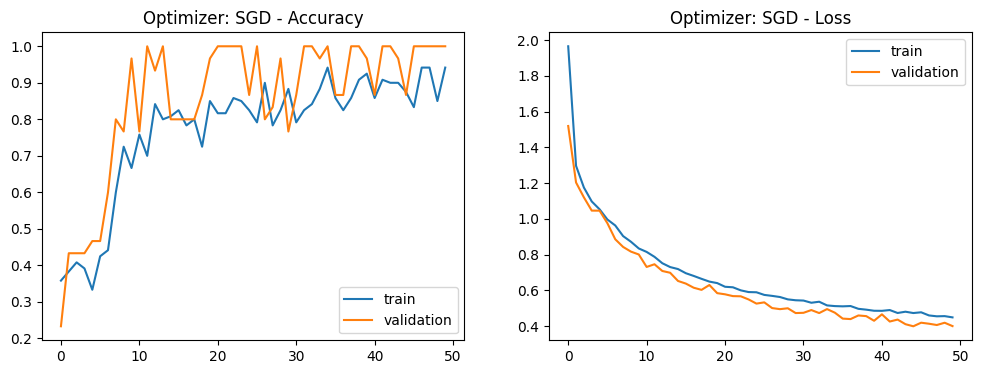


Тестування оптимізатора: Adam


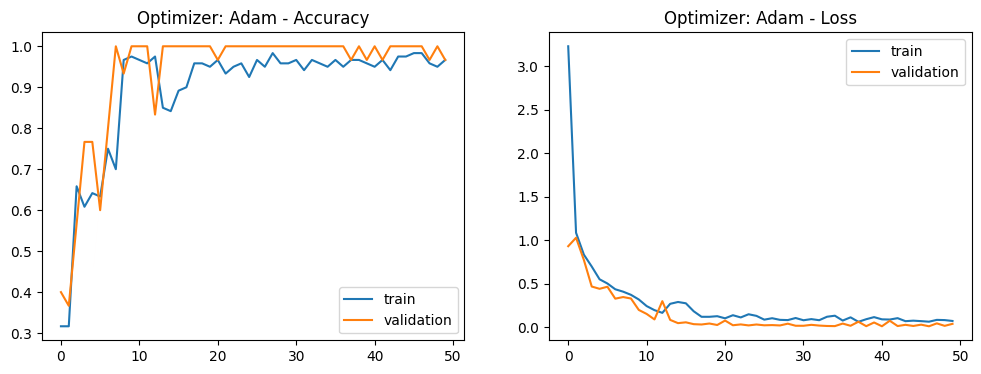


Тестування оптимізатора: RMSprop


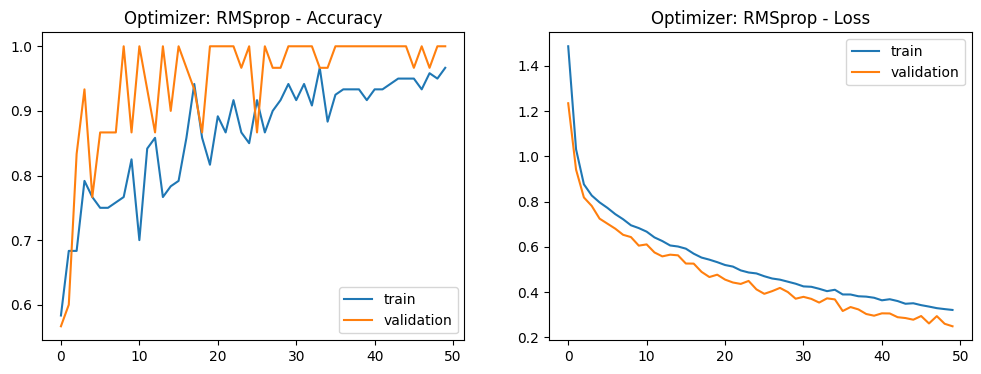


Тестування оптимізатора: Adagrad


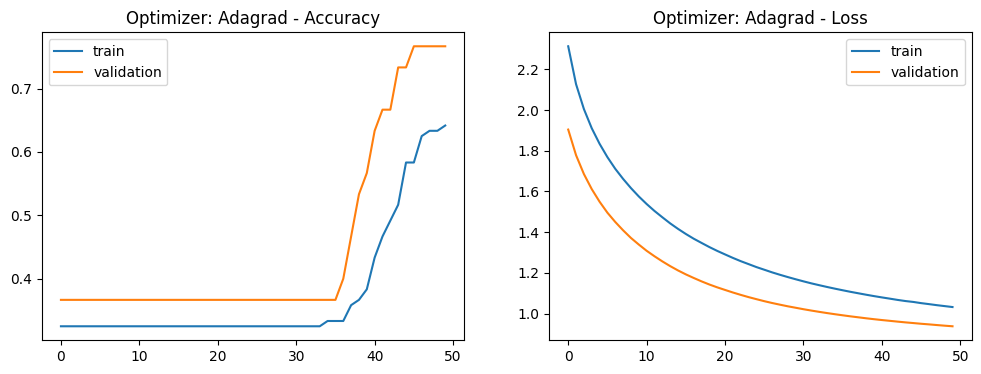


2. Тестування різних архітектур

Тестування конфігурації шарів: [64]


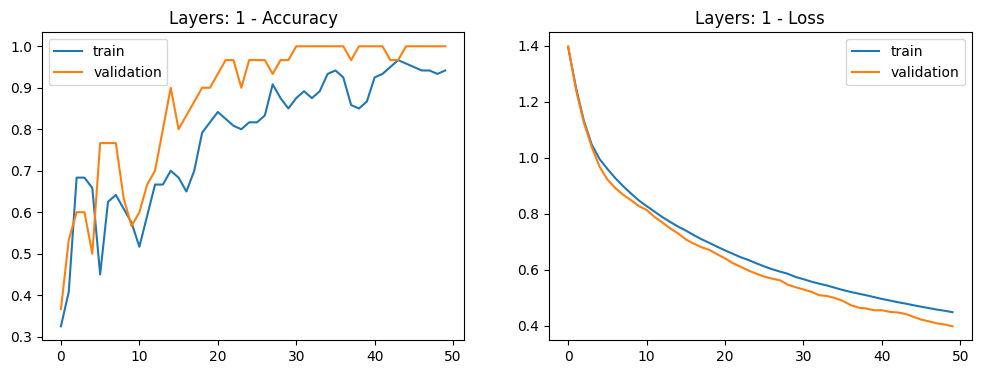


Тестування конфігурації шарів: [64, 32]


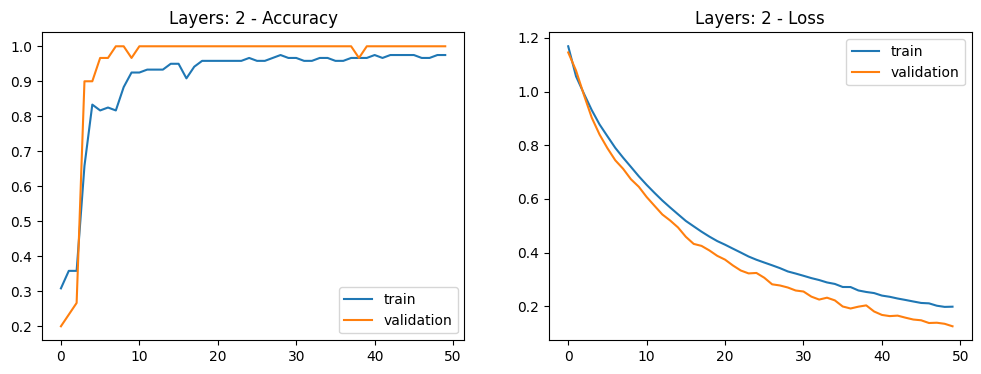


Тестування конфігурації шарів: [64, 32, 16, 8]


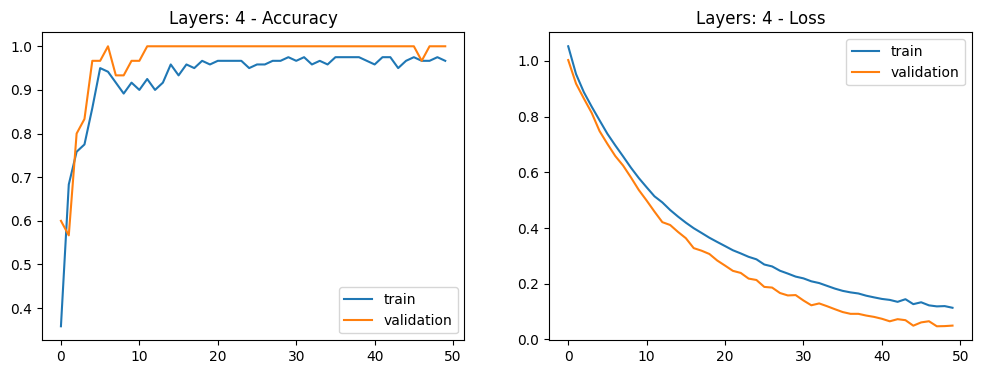


3. Тестування на власному наборі даних

Тестування оптимізатора на власному датасеті: SGD


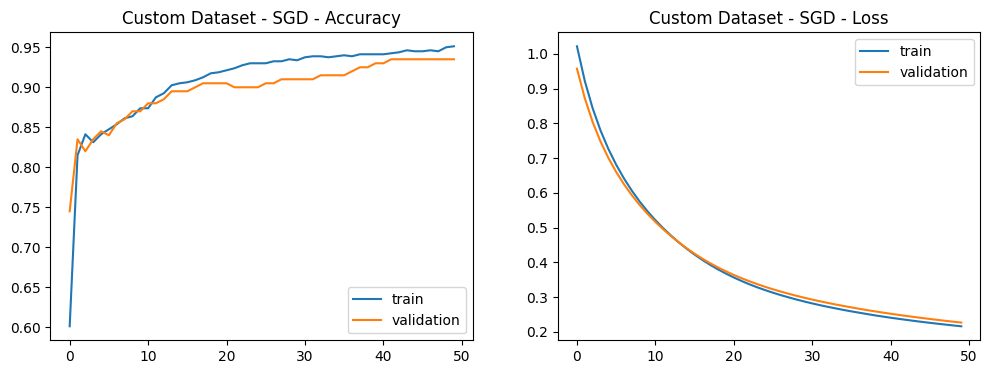


Тестування оптимізатора на власному датасеті: Adam


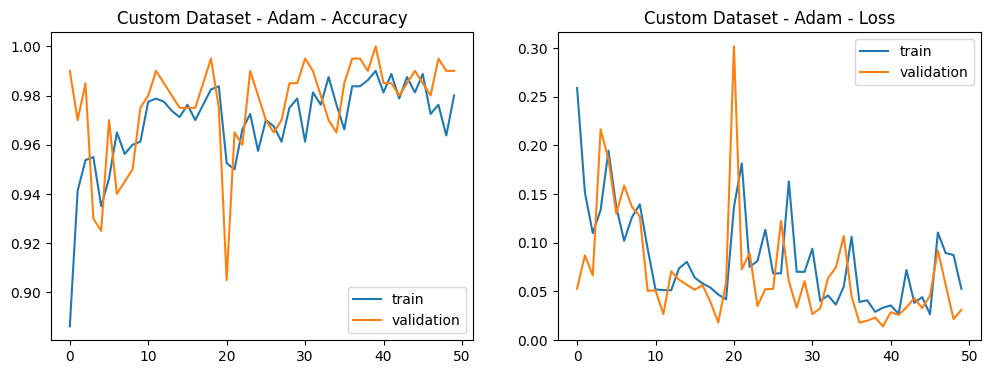


Тестування оптимізатора на власному датасеті: RMSprop


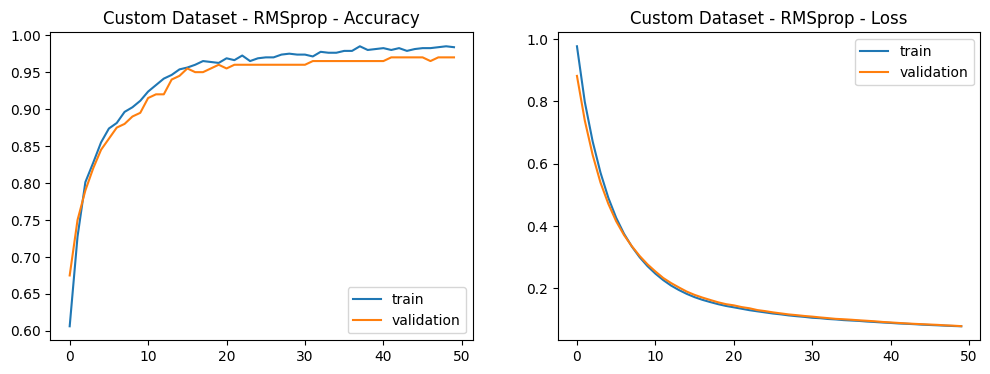


Тестування оптимізатора на власному датасеті: Adagrad


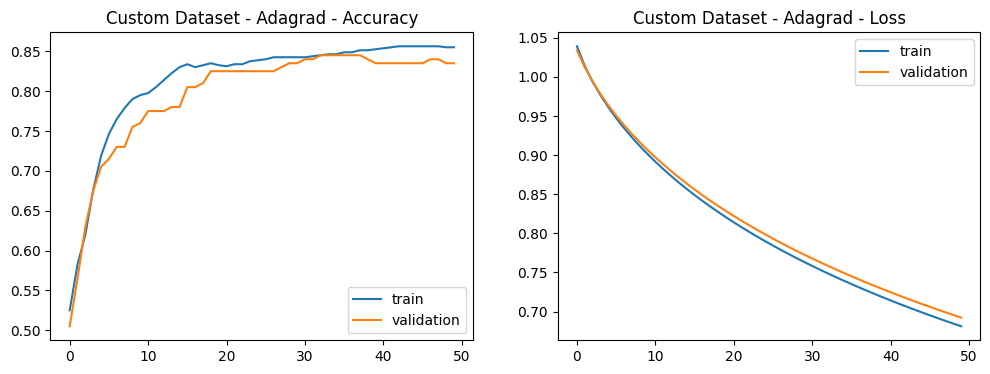

In [102]:
# Завантажимо та підготуємо дані з Iris dataset
X, y = load_uci_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Визначимо базові параметри
input_shape = X_train.shape[1]
num_classes = len(np.unique(y))

# 1. Порівняння різних оптимізаторів

optimizers = {
    'SGD': lambda: tf.keras.optimizers.SGD(learning_rate=0.01),
    'Adam': lambda: tf.keras.optimizers.Adam(learning_rate=0.1),
    'RMSprop': lambda: tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adagrad': lambda: tf.keras.optimizers.Adagrad(learning_rate=0.001)
}

print("1. Тестування різних оптимізаторів")
for opt_name, opt_fn in optimizers.items():
    print(f"\nТестування оптимізатора: {opt_name}")
    optimizer = opt_fn()
    model = create_base_model(optimizer, input_shape, num_classes)
    history = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=50,
                      verbose=0,
                      batch_size=32)
    plot_training_history(history, f"Optimizer: {opt_name}")

# 2. Експерименти з різною кількістю шарів
print("\n2. Тестування різних архітектур")
layer_configurations = [
    [64],  # 1 шар
    [64, 32],  # 2 шари
    [64, 32, 16, 8]  # 4 шари
]

for layers in layer_configurations:
    print(f"\nТестування конфігурації шарів: {layers}")
    model = create_deep_model(len(layers), layers, tf.keras.optimizers.Adam())
    history = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=70,
                      verbose=0,
                      batch_size=32)
    plot_training_history(history, f"Layers: {len(layers)}")

# 3. Тестування на власному наборі даних
print("\n3. Тестування на власному наборі даних")
X_custom, y_custom = create_custom_dataset()
X_train, X_test, y_train, y_test = train_test_split(X_custom, y_custom, test_size=0.2)
input_shape = X_train.shape[1]

for opt_name, opt_fn in optimizers.items():
    print(f"\nТестування оптимізатора на власному датасеті: {opt_name}")
    optimizer = opt_fn() 
    model = create_base_model(optimizer, input_shape, num_classes)
    history = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=50,
                      verbose=0,
                      batch_size=32)
    plot_training_history(history, f"Custom Dataset - {opt_name}")





4. Тестування на датасеті Wine

Wine Dataset Head:
Features:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


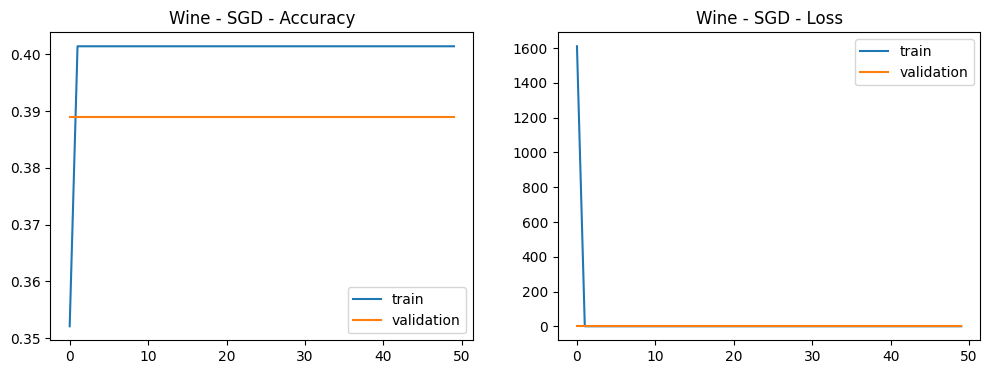


Тестування оптимізатора на Wine: Adam
input_shape: 13 num_classes: 3


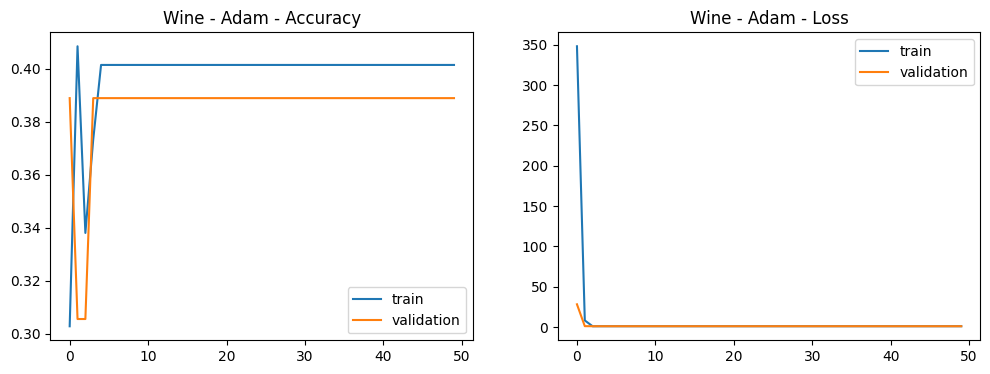


Тестування оптимізатора на Wine: RMSprop
input_shape: 13 num_classes: 3


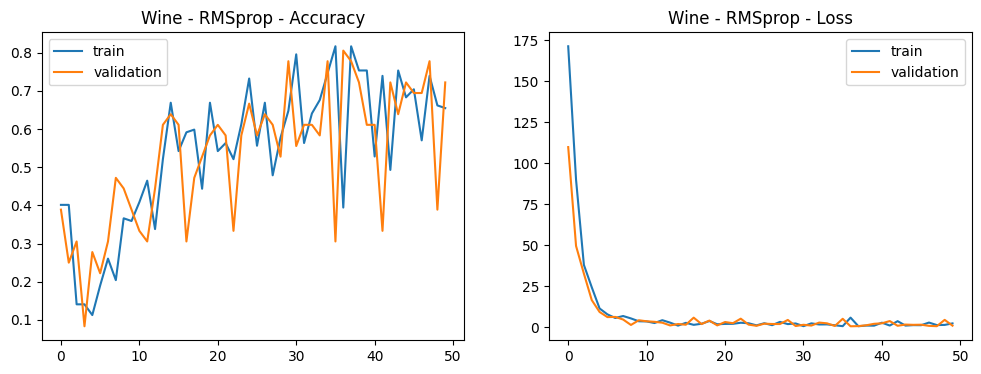


Тестування оптимізатора на Wine: Adagrad
input_shape: 13 num_classes: 3


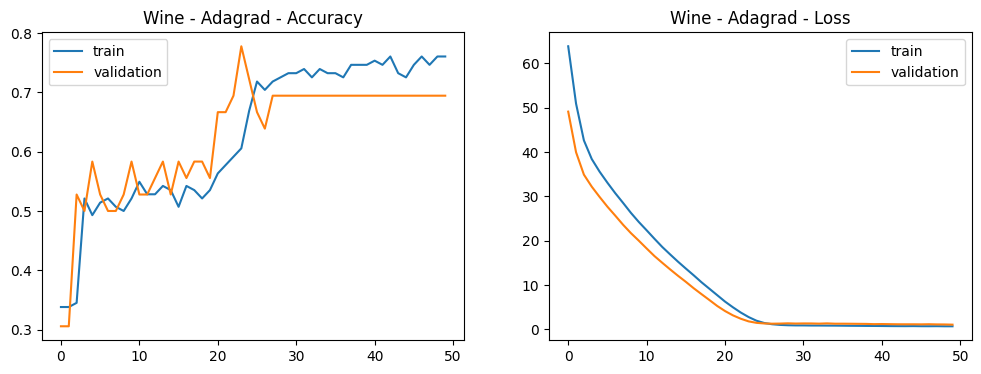

In [103]:
# 4. Тестування на іншому UCI датасеті (Wine)
print("\n4. Тестування на датасеті Wine")
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
input_shape = X_train.shape[1]
num_classes = len(np.unique(y))
print("\nWine Dataset Head:")
print("Features:")
print(pd.DataFrame(X, columns=data.feature_names).head())
print("Target (Wine Types):")
print(pd.Series(y).head())

for opt_name, opt_fn in optimizers.items():
    print(f"\nТестування оптимізатора на Wine: {opt_name}")
    optimizer = opt_fn()
    model = create_base_model(optimizer, input_shape, num_classes)
    
    print('input_shape:', input_shape, 'num_classes:', num_classes)
    
    history = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=50,
                      verbose=0,
                      batch_size=32)
    plot_training_history(history, f"Wine - {opt_name}")